# Вычисление натурального логарифма через ряд Тейлора

### $\textit{Сравнение библиотечной и "самодельной" функций}$

Разложение натурального логарифма в ряд Тейлора выглядит следующим образом:

$$\ln (1+x) = x - \frac{x^2}{2} + \frac{x^3}{3} - \frac{x^4}{4} + \ldots = \sum_{n=0}^N \frac{(-1)^n}{n+1} x^{n+1}, |x| < 1 .$$

Теперь построим функцию $\textsf{my\_ln}$ по приведённой выше формуле частичной суммы ряда Тейлора:

In [4]:
import math

'''
# Это часть кода для стандартной программы .py, а не блокнота

x = float(input("\n|x| < 1, x = "))
iterations = int(input("Кол-во слагаемых (точность вычислений): "))
'''

x = 0.5 # |x| < 1
iterations = 20 # Кол-во слагаемых (точность вычислений)

def my_ln(x):
    """
    Вычисление натурального логарифма при помощи частичного суммирования ряда Тейлора
    """
    partial_sum = 0
    for i in range(iterations + 1):
        partial_sum += (((-1) ** i) * (x ** (i + 1))) / (i + 1) # Cама формула частичной суммы
    return partial_sum

print("\nln(1 + " + str(x) + ") = ", end = '')
print(str(math.log(1 + x)) + " (библиотечная ф-ия)" )
print("              " + str(my_ln(x)) + " (самодельная ф-ия)")



ln(1 + 0.5) = 0.4054651081081644 (библиотечная ф-ия)
              0.4054651154407084 (самодельная ф-ия)


Теперь построим графики "нашего" и библиотечного логарифмов:

/var/folders/vr/ln2fsc8d47nb1fjtvb33s5w00000gn/T/ipykernel_17089/827980839.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


<function my_ln at 0x11338b760> <numpy.vectorize object at 0x11a3c49a0>


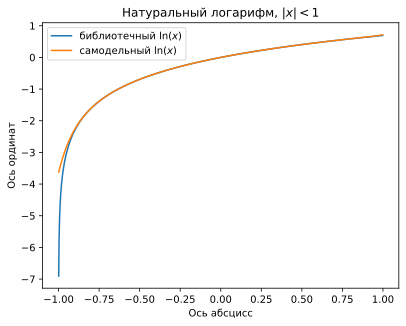

In [28]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import matplotlib.pyplot as plt
import numpy as np

v_ln = np.vectorize(my_ln)
print(my_ln, v_ln)

x = np.r_[-0.999:0.999:0.001] # Представление интервала (-1, 1)

plt.plot(x, np.log(1 + x), label = 'библиотечный $\ln (x)$')
plt.plot(x, v_ln(x), label = 'самодельный $\ln (x)$')
plt.xlabel('Ось абсцисс')
plt.ylabel('Ось ординат')
plt.title('Натуральный логарифм, $|x| < 1$')
plt.legend()
plt.show()
